In [2]:
from hipecta.data import ctaTelescope2Matrix
from hipecta import core
import numpy as np
import h5py
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, ConcatDataset, sampler
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import hipecta.plots as plots
from torchvision import transforms, utils
import math
import time
import os
import sys

converter_path = os.path.abspath(os.path.join('/home/jacquemm/GammaLearn/converter_hdf5'))
if converter_path not in sys.path:
    sys.path.append(converter_path)
    
from converter_hdf5 import *
from datasets import *

In [3]:
test_file = '/home/jacquemm/hdf5/gamma_diffuse/LaPalma_gamma_diffuse_20deg_0deg_prod3b_training_0000.hdf5'
f = h5py.File(test_file, 'r')
injTable = np.array(f['/Cameras/LSTCAM/injTable'])
nbRow = f['/Cameras/LSTCAM'].attrs['nbRow']
nbCol = f['/Cameras/LSTCAM'].attrs['nbCol']
pixel_pos = np.array(f['/Cameras/LSTCAM/pixelsPosition'])
test_dataset = LSTCamDataset(hdf5_file=f,
                             transform=transforms.Compose([
                                 TelescopeToSquareMatrix(injTable, nbRow, nbCol),
                                 ToTensor()
                             ]))

test_dataset_2 = LSTCamDataset(hdf5_file=f)

In [5]:
pix2 = np.array([])
en = np.array([])
alt = np.array([])
az = np.array([])
x = np.array([])
y = np.array([])
for i in range(len(test_dataset_2)):
    pix2 = np.append(pix2, test_dataset_2[i]['image'])
    en = np.append(en, test_dataset_2[i]['labels'][0])
    x = np.append(x, test_dataset_2[i]['labels'][1])
    y = np.append(y, test_dataset_2[i]['labels'][2])
    alt = np.append(alt, test_dataset_2[i]['labels'][3])
    az = np.append(az, test_dataset_2[i]['labels'][4])

### Pixels distribution in transformed dataset

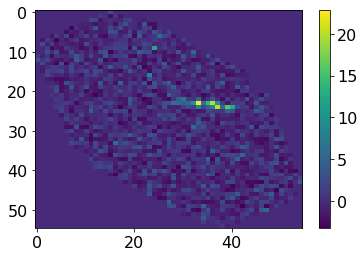

In [6]:
sample = test_dataset[4833]
plots.plotmatrix(sample['image'][0].numpy())

In [7]:
pix = np.array([])
for i in range(len(test_dataset)):
    pix = np.append(pix, test_dataset[i]['image'][0].numpy())

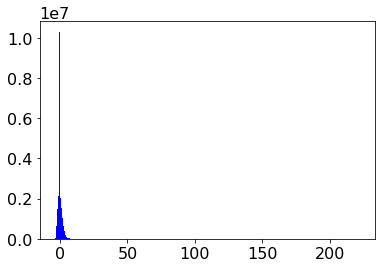

In [8]:
plt.hist(pix, facecolor='blue', bins=300)
#plt.hist(sample['image'][0].numpy(), facecolor='blue')
plt.show()

### Pixels distribution in original dataset

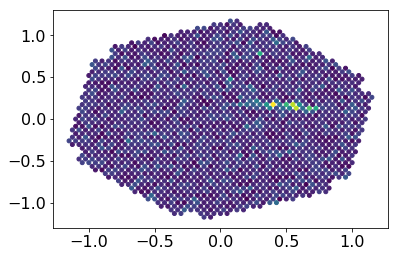

In [9]:
sample2 = test_dataset_2[4833]
cm = plt.get_cmap('viridis')
plt.scatter(pixel_pos[:,0], pixel_pos[:,1], c=sample2['image'], cmap=cm, s = 16)
plt.show()

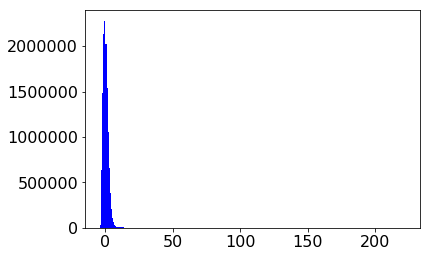

In [10]:
plt.hist(pix2, facecolor='blue', bins=300)
plt.show()

### Energy distribution in dataset

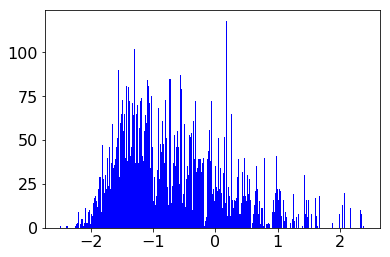

Mean energy  3.18248896539
Var  265.054230187


In [12]:
plt.hist(np.log10(en), facecolor='blue', bins=300)
plt.show()
print('Mean energy ', np.mean(en))
print('Var ', np.var(en))

### Altitude distribution in dataset

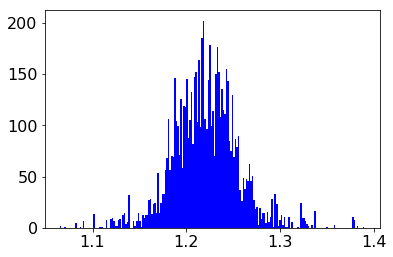

Mean altitude  1.22094230805
Var  0.00129162987359


In [13]:
plt.hist(alt, facecolor='blue', bins=200)
plt.show()
print('Mean altitude ', np.mean(alt))
print('Var ', np.var(alt))

### Azimuth distribution in dataset

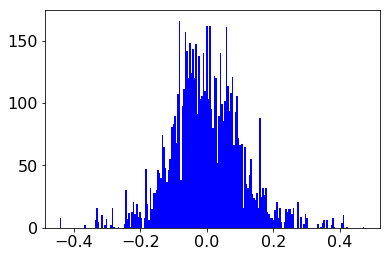

Mean azimuth  -0.00108441404261
Var  0.0116011941911


In [14]:
plt.hist(az, facecolor='blue', bins=200)
plt.show()
print('Mean azimuth ', np.mean(az))
print('Var ', np.var(az))

### xCore distribution in dataset

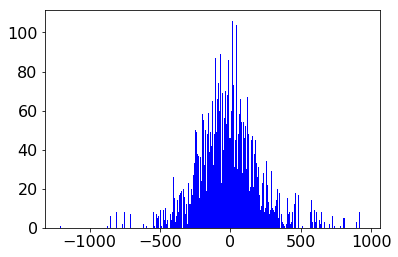

Mean xCore  -10.2912064333
Var  52416.2510792


In [15]:
plt.hist(x, facecolor='blue', bins=500)
plt.show()
print('Mean xCore ', np.mean(x))
print('Var ', np.var(x))

### yCore distribution in dataset

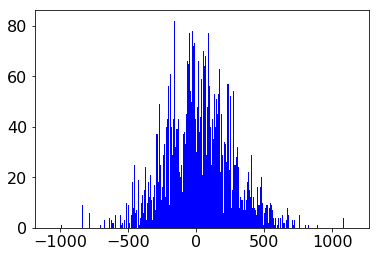

Mean yCore  13.8954018946
Var  63484.1647389


In [16]:
plt.hist(y, facecolor='blue', bins=500)
plt.show()
print('Mean yCore ', np.mean(y))
print('Var ', np.var(y))

In [ ]:
f.close()